<a href="https://colab.research.google.com/github/Chrostowska/Code/blob/Notes-TF/Lesson_4_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''NEURAL NETWORKS:
provide classification or prediction

-input informations ---(neural network[function(x)])---> output informations

input layer (first layer)

            input layer   output layer
input info --->  O            [0, 1] - output value are between 0 and 1
input info --->  O    ---->  O
input info --->  O

classification of the image: picture with a pixels 28x28 ---> 784 pixels ---> 784 inputs
output (we have 2 classes) one output neuron [0, 1] - value of that output neuron

closer to 0, class 1
closer to 1, class 2


also as many outputs neuron as many classes to the prediction (5 classes 5 outputs)
            input layer   output layer
                              [0, 1] each
input info --->  O    ---->  O [0.9]
input info --->  O    ---->  O [0.001]
input info --->  O    ---->  O [0.05]   -----> sum all 5 values of outputs to 1.0
input info --->  O    ---->  O [0.004]
input info --->  O    ---->  O [0.045]   probability distribution for output layer
...



data points (x, y, z)
categories red, blue

            input layer      hidden layer     output layer
input info ---> x O val 2
                       --->      N1 O                  [0, 1] range between 0 and 1
input info ---> y O val 2                ---->     O    ----> information (red[0] or blue[1])
                       --->      N2 O
input info ---> z O val 2
                                    B
                  B
      n                   n           Wi Xi
N1 = Σ Wi Xi  + b   ---> Σ Wi Xi ---> Wx(2) + Wy(2) + Wz(2) = V
      i = 0              i = 0



Σ - sum
W - weight
i - index
n - how many neurons in previouse layer (what index go up to)
b - bias - the next layer of the complexicity, allowes to shift the activation function in the left, right, up, down



trainable parameters:
weights
bias

weights - connections between nodes
B - bias: constant numeric value (weight 1)
 only 1 bias per layer, exist in previouse layer to the layer that it's affect
denselly connected neural networks - each node (neuron) from previouse layer is connected to every node in the next layer

how many connections, 6, bcs 3 x 2 = 6
'''

In [ ]:
'''ACTIVATION FUNCTIONS
- moves up in the dimensionality (higer dimension)



RELU [0, ...infinity] - eliminate negative numbers
Tanh [-1, 1]
Sigmoid [0, 1]


Input function on hidden layer:
        n                   n           Wi Xi
N1 = F(Σ Wi Xi  + b)   ---> Σ Wi Xi ---> Wx(2) + Wy(2) + Wz(2) = V
        i = 0
F - activation function



data points (x, y, z)
categories red, blue

            input layer      hidden layer     output layer
input info ---> x O val 2
                       --->      N1 O           sigmoid func [0, 1] range between 0 and 1
input info ---> y O val 2                ---->     O    ----> Sigmoid(N1 W0 + N2 W1 + b)
                       --->      N2 O
input info ---> z O val 2
'''

In [ ]:
'''LOSS(COST) FUNCTION

calculate how far away our output is from the expected output
giving the idea how bad/good our neural network was (higher value - worse network)

training of the netwoerk:
giving input
giving expected output

expected output red [0]

data points (x, y, z)
categories red, blue

            input layer      hidden layer     output layer    output      expected output
input info ---> x O val 2
                       --->      N1 O          sigma act f
input info ---> y O val 2                ---->     O    ----> [0.7]           [0.]
                       --->      N2 O
input info ---> z O val 2




UPDATING WEIGHTS AND BIASES

gradient descent - slipness/direction (we are moving to that direction) optimization alghoritm used for find optimal parameters(weights, biases) for neural network
 (update the parameters of the model) for minimize loss function output (advanced math).
backpropagation - Stepping back throught the network and updating weights and biases according to the gradient which we had calculated.

'''

In [ ]:
'''OPTIMIZER

Algorithm(function) implementing backpropagation and Gradient Descent. The list of common ones:
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerator Gradient
'''

In [56]:
'''NEURAL NETWORK MODEL'''

%tensorflow_version 2.x

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [57]:
''' Fashion MNIST dataset included in Keras. Contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by
28 pixels). This dataset include 60 000 images for training and 10 000 for validation/testing.'''

fashion_mnist = keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training
#labels are from 0 to 9 which are categories



In [36]:
train_images.shape # 60 000 images (28 by 28 pixels) - 784 pixels in total for one image

(60000, 28, 28)

In [5]:
train_images[0, 23, 23] #look at 1 pixel from row 23 column 23. One pixel represent by the value between 0 (black) and 255(white) - gray scale pictures

194

In [13]:
train_labels[:10] #Each label is an integer between 0 and 9. Each integer represent a specific article of clothing. We'll create an array of label names
#to indicate which is which

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [41]:
test_images.shape

(10000, 28, 28)

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

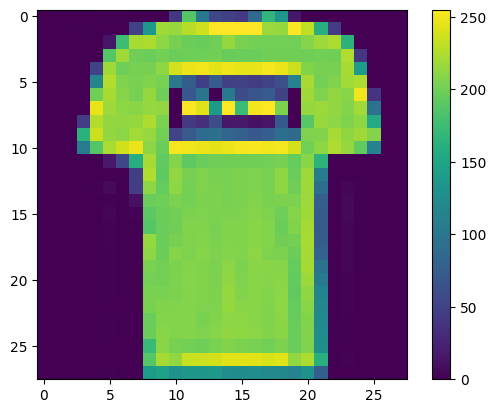

In [9]:
# how the image look likes
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [59]:
# DATA PREPROCESSING
#placing all the values between 0 and 1 for neural networks

train_images = train_images / 255.0
test_images = test_images / 255.0

In [60]:
# MODEL - architecture of the neural networks

model = keras.Sequential([    #sequential is the most basic, one way neural network (from lrft to right)
    keras.layers.Flatten(input_shape = (28, 28)),   #input layer (1), Flatten is taking 28x28 pisel and latten them in a sequence (ciag/linia) of 784 pixels
    keras.layers.Dense(128, activation = 'relu'),   #hidden layer (2), 128 picking that number of the input depends of the problem, sometimes little smaller than the input, or bigger, or half
    keras.layers.Dense(10, activation = 'softmax')  #output layer (3), 10 bcs of 10 classes which we trying to predict
])

In [61]:
# COMPILE THE MODEL - define the loss function, optimizers and metrics we would like to track

# HYPER PARAMITER TUNING - changing optimizer function, loss function, metrics, activation function, nr of the neurons, epochs... and checking out how model perform with different parameter changed

model.compile(optimizer = 'adam',  #adam is alghoritm performing gradient descent
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) #what we are looking for, what we want to see at the output which is accuracy

In [62]:
# TRAINING

model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4945 - accuracy: 0.8263


In [63]:
#TESTING

#test_loss, test_accuracy - splitting into this 2 so we can have look on one of that

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)  #verbose - are we looking at output or not, how much info we see as this model evaluates
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.8021
Test accuracy: 0.8021000027656555


313/313 [==============================] - 1s 2ms/step
Pullover


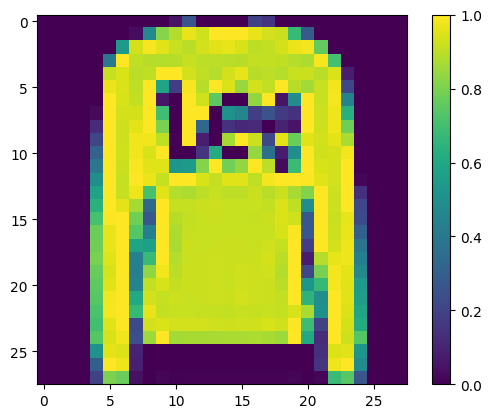

In [64]:
# PREDICTION

predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 45
1/1 [==============================] - 0s 19ms/step


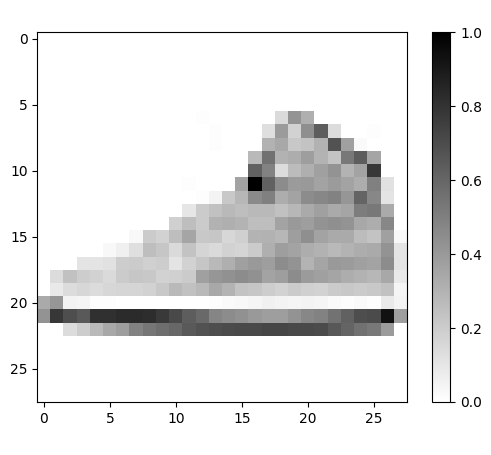

In [85]:
#Simply small function to help verify predictions with some simple visuals


COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('Expected:' + label)
  plt.xlabel('Guess:' + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
  else:
    print('Try again...')


num = get_number()
label = test_labels[num]
image = test_images[num]
predict(model, image, label)
